In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
data.shape[0]

569

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [8]:
X_train.shape[0]

398

In [9]:
X_test.shape[0]

171

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

/Users/antonshishkov/Desktop/ranepa/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_proba = lr.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [16]:
def print_metrics(y_test, y_pred, y_proba):
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("Metrics")
    print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 4)}")
    print(f"Precision: {round(precision_score(y_test, y_pred), 4)}")
    print(f"Recall: {round(recall_score(y_test, y_pred), 4)}")
    print(f"F1: {round(f1_score(y_test, y_pred), 4)}")
    print(f"RAS: {round(roc_auc_score(y_test, y_proba), 4)}")

In [17]:
print_metrics(y_test, y_pred, y_proba)

Confusion Matrix
[[ 59   4]
 [  1 107]]
Metrics
Accuracy: 0.9708
Precision: 0.964
Recall: 0.9907
F1: 0.9772
RAS: 0.9969


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

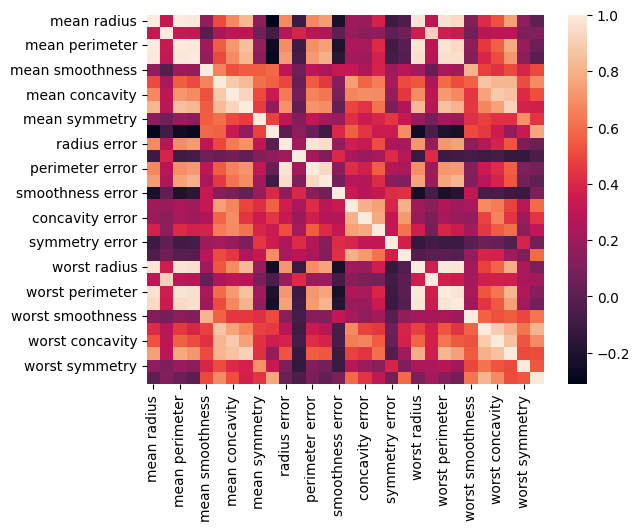

In [19]:
sns.heatmap(data.corr())

In [20]:
import numpy as np

In [21]:
pairs_set = set()
corrs = data.corr()[data.corr() > 0.9].to_numpy()
print(corrs.shape)
cols = data.columns

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        if i != j and not np.isnan(corrs[i][j]):
            pairs_set.add("-".join(sorted([cols[i], cols[j]])))

(30, 30)


In [22]:
sorted(pairs_set)

['area error-perimeter error',
 'area error-radius error',
 'mean area-mean perimeter',
 'mean area-mean radius',
 'mean area-worst area',
 'mean area-worst perimeter',
 'mean area-worst radius',
 'mean concave points-mean concavity',
 'mean concave points-worst concave points',
 'mean perimeter-mean radius',
 'mean perimeter-worst area',
 'mean perimeter-worst perimeter',
 'mean perimeter-worst radius',
 'mean radius-worst area',
 'mean radius-worst perimeter',
 'mean radius-worst radius',
 'mean texture-worst texture',
 'perimeter error-radius error',
 'worst area-worst perimeter',
 'worst area-worst radius',
 'worst perimeter-worst radius']

In [23]:
data = data.drop(columns=["area error", "mean area", "mean concave points", "mean perimeter", "mean radius", "mean texture", "perimeter error", "worst area", "worst perimeter"])

<Axes: >

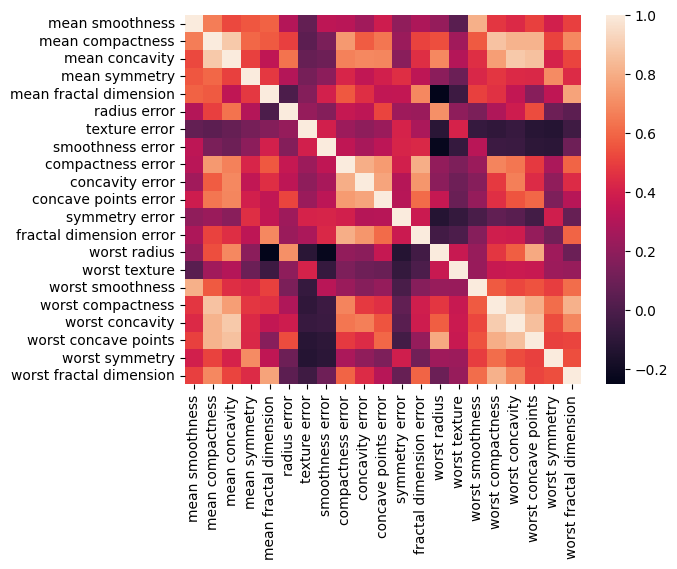

In [24]:
sns.heatmap(data.corr())

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
sc.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [29]:
import pandas as pd

In [30]:
X_train = pd.DataFrame(data=sc.transform(X_train), columns=data.columns)

In [31]:
X_train.head()

,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.201680,-0.773170,-0.762312,-1.229949,-0.948166,-0.533593,-0.860288,-1.355562,-0.525032,-0.481703,...,-0.884593,-0.685487,-0.197620,-0.506748,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-1.804637,-0.587616,-0.091985,-1.419985,-0.612491,-0.830401,-0.122667,-0.364907,0.408619,0.576685,...,-1.035724,0.107689,-0.422917,-0.458495,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.519184,1.570006,0.732320,1.054201,1.574228,0.487478,0.592589,0.939567,1.506967,0.683623,...,0.769101,0.624386,0.036022,-1.192272,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-1.203862,-0.970650,-0.634704,0.096572,-0.827986,-0.725949,-0.568787,-0.564581,-0.527814,-0.301474,...,-0.230110,-0.619011,-0.502189,-0.583287,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.254695,-0.700630,-0.750349,-0.518248,-0.642882,-0.202659,0.255204,-0.381305,-0.242934,-0.401416,...,0.062159,-0.456221,-0.195534,0.596414,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613


In [32]:
X_test = pd.DataFrame(data=sc.transform(X_test), columns=data.columns)

In [33]:
X_test.head()

,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.268255,0.048819,-0.103177,0.454285,0.147266,-0.029952,-0.307747,-0.032438,-0.347538,-0.174881,...,-0.318790,-0.077386,-0.274805,-0.144019,0.470899,-0.076033,-0.007133,-0.193383,0.210480,0.226487
1,-0.427073,-0.007883,0.256363,-0.823795,-1.112550,1.323778,-0.782978,-0.839174,-0.491648,-0.318798,...,-0.813399,-0.790488,1.788338,0.178777,-0.542399,-0.104328,0.001034,1.019684,-0.533417,-1.008662
2,0.962856,0.371436,0.752901,0.476642,-0.649789,0.239622,-0.805342,-0.261694,-0.585124,-0.137569,...,-0.799660,-0.502301,0.620127,0.082271,0.992770,-0.065254,0.564609,0.588685,-0.073904,-0.191326
3,0.686470,0.553274,-0.137137,0.029501,1.154290,-0.786276,0.494266,0.947284,0.422529,0.544703,...,0.187060,0.836277,-0.710798,-0.431872,0.575273,0.093064,-0.143943,-0.629083,-0.525384,0.574570
4,0.282075,0.170045,-0.266288,0.055584,0.712249,-0.435692,1.088063,1.638588,0.877114,0.775236,...,-0.246347,0.650069,-0.840135,-0.969310,0.118637,-0.251194,-0.453296,-0.699924,-0.890102,-0.125596


In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred = lr.predict(X_test)

In [37]:
y_proba = lr.predict_proba(X_test)[:,1]

In [38]:
print_metrics(y_test, y_pred, y_proba)

Confusion Matrix
[[ 62   1]
 [  3 105]]
Metrics
Accuracy: 0.9766
Precision: 0.9906
Recall: 0.9722
F1: 0.9813
RAS: 0.9966


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression())
    ]
)

In [42]:
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [43]:
y_pred = model.predict(X_test)

In [44]:
y_proba = model.predict_proba(X_test)[:, 1]

In [45]:
print_metrics(y_test, y_pred, y_proba)

Confusion Matrix
[[ 62   1]
 [  3 105]]
Metrics
Accuracy: 0.9766
Precision: 0.9906
Recall: 0.9722
F1: 0.9813
RAS: 0.9966


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [47]:
model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression())
    ]
)

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
sc = StandardScaler()

In [50]:
sc.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [51]:
X_train = pd.DataFrame(data=sc.transform(X_train), columns=data.columns)

In [52]:
X_test = pd.DataFrame(data=sc.transform(X_test), columns=data.columns)

In [53]:
lr = LogisticRegression()

In [54]:
gscv = GridSearchCV(
    lr,
    param_grid={
        "random_state": [42],
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"]
    }
)

In [55]:
gscv.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'penalty': ['l1', 'l2'], 'random_state': [42], 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [56]:
sorted(gscv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_penalty',
 'param_random_state',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [57]:
y_pred = gscv.best_estimator_.predict(X_test)

In [58]:
y_proba = gscv.best_estimator_.predict_proba(X_test)[:,1]

In [59]:
print_metrics(y_test, y_pred, y_proba)

Confusion Matrix
[[ 62   1]
 [  3 105]]
Metrics
Accuracy: 0.9766
Precision: 0.9906
Recall: 0.9722
F1: 0.9813
RAS: 0.9966


In [60]:
gscv.best_params_

{'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}